In [68]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
def ret_victory_home(row):
    if row['goal1'] > row['goal2']:
        return 'победа'
    elif row['goal1'] < row['goal2']:
        return 'поражение'
    else:
        return 'ничья'
    
def ret_victory_guest(row):
    if row['goal1'] > row['goal2']:
        return 'поражение'
    elif row['goal1'] < row['goal2']:
        return 'победа'
    else:
        return 'ничья'

Загружаем таблицы

In [153]:
countries = pd.read_csv('countries.csv')
players = pd.read_csv('players.csv')
events_df = pd.read_csv('events.csv')
lineups_df = pd.read_csv('lineups.csv')

Правим таблицы

In [154]:
countries.columns = ['country_id', 'country']
players.columns = ['num', 'name', 'team', 'birthdate', 'pos', 'country_id']
players = players.merge(countries, on='country_id')
players['birthdate'] = pd.to_datetime(players['birthdate'], format='%d-%m-%Y')
players['age'] = ((dt.datetime.now() - players['birthdate']).dt.days / 365).apply(np.floor)

In [155]:
players.head()

,num,name,team,birthdate,pos,country_id,country,age
0,1,Мануэль Нойер,Бавария,1986-03-27,врт,1,Германия,38.0
1,12,Оливер Бауман,Хоффенхайм,1990-06-02,врт,1,Германия,34.0
2,22,Марк-Андре тер Стеген,Барселона,1992-04-30,врт,1,Германия,32.0
3,2,Антонио Рюдигер,Реал Мадрид,1993-03-03,зщ,1,Германия,31.0
4,3,Давид Раум,РБ Лейпциг,1998-04-22,зщ,1,Германия,26.0


## Предварительная статистика

In [156]:
(players.
 pivot_table(index='team', values='num', aggfunc='count').
 sort_values(by='num', ascending=False).
 head(10)
)

,num
team,
Интер Милан,13
Манчестер Сити,13
Пари Сен-Жермен,12
Реал Мадрид,12
РБ Лейпциг,11
Барселона,11
Арсенал,10
Славия (Прага),10
Байер 04,10


### Возраст игроков

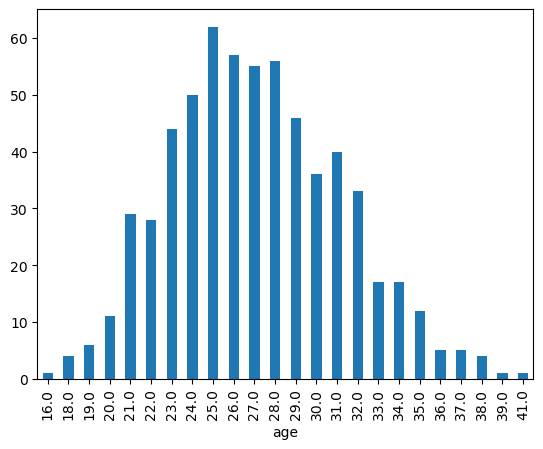

In [157]:
players.groupby('age')['num'].count().plot(kind='bar');

In [158]:
players['age'].describe()

count    620.000000
mean      27.112903
std        4.125279
min       16.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       41.000000
Name: age, dtype: float64

Самые возрастные игроки

In [159]:
players.sort_values(by='birthdate').head(5)

,num,name,team,birthdate,pos,country_id,country,age
572,3,Пепе,Порту,1983-02-26,защ,23,Португалия,41.0
587,7,Криштиану Роналду,Ан-Наср (Эр-Рияд),1985-02-05,нап,23,Португалия,39.0
143,10,Лука Модрич,Реал Мадрид,1985-09-09,поз,6,Хорватия,38.0
113,22,Хесус Навас,Севилья,1985-11-21,защ,5,Испания,38.0
542,1,Георгий Лория,Динамо Тбилиси,1986-01-27,врт,22,Грузия,38.0


Самые молодые игроки

In [160]:
players.sort_values(by='birthdate', ascending=False).head(5)

,num,name,team,birthdate,pos,country_id,country,age
127,19,Ламин Ямаль,Барселона,2007-07-13,нап,5,Испания,16.0
403,18,Варрен Заир-Эмри,Пари Сен-Жермен,2006-03-08,поз,16,Франция,18.0
462,24,Лео Сауэр,Фейеноорд,2005-12-16,нап,18,Словакия,18.0
539,24,Семих Кылычсой,Бешикташ,2005-08-15,нап,21,Турция,18.0
559,26,Габриэль Сигуа,Базель,2005-06-30,поз,22,Грузия,18.0


Самые возрастные команды

In [161]:
players.pivot_table(index='country', values='age', aggfunc='mean').sort_values(by='age', ascending=False).head(5)

,age
country,
Германия,28.576923
Шотландия,28.307692
Польша,28.208333
Хорватия,27.730769
Дания,27.730769


Самые молодые команды

In [162]:
players.pivot_table(index='country', values='age', aggfunc='mean').sort_values(by='age').head(5)

,age
country,
Чехия,25.500000
Турция,25.807692
Англия,26.076923
Нидерланды,26.230769
Украина,26.384615


## Статистика турнира

### Бомбардиры

In [140]:
scorers = events_df[events_df['event'].isin(['гол','пенальти'])]
scorers.pivot_table(index='name', values='event', aggfunc='count')

,event
name,
Джамал Мусиала,1
Кай Хаверц,1
Флориан Вирц,1


### Ассистены

In [141]:
assisters = events_df[events_df['event']=='пас']
assisters.pivot_table(index='name', values='event', aggfunc='count')

,event
name,
Йозуа Киммих,1
Кай Хаверц,1


### Карточки

In [142]:
yellows = events_df[events_df['event']=='желтая карточка']
yellows.pivot_table(index='name', values='event', aggfunc='count')

,event
name,
Роберт Андрих,1
Энтони Ралстон,1


In [143]:
reds = events_df[events_df['event']=='красная карточка']
reds.pivot_table(index='name', values='event', aggfunc='count')

,event
name,
Райан Портеус,1


### Время игры

In [152]:
lineups_df['total'] = lineups_df['out'] - lineups_df['in']
lineups_df.pivot_table(index='name', values='total', aggfunc='sum').sort_values(by='total', ascending=False).head(20)

,total
name,
Ангус Ганн,90
Илкай Гюндоган,90
Эндрю Робертсон,90
Скотт Мактоминей,90
Мануэль Нойер,90
Антонио Рюдигер,90
Йозуа Киммих,90
Максимилиан Миттельштедт,90
Джонатан Та,90


## Старые игры

In [165]:
old_games = pd.read_csv('old_games.csv')
old_games.columns = ['game_id', 'date', 'team1', 'team2', 'goal1', 'goal2', 'description'] 
old_games['date'] = pd.to_datetime(old_games['date'], format='%d-%m-%Y')

In [166]:
old_games.head()

,game_id,date,team1,team2,goal1,goal2,description
0,0,2021-06-11,Турция,Италия,0,3,ЧЕ-2020 Группа A тур 1
1,1,2021-06-12,Уэльс,Швейцария,1,1,ЧЕ-2020 Группа A тур 1
2,2,2021-06-12,Дания,Финляндия,0,1,ЧЕ-2020 Группа B тур 1
3,3,2021-06-12,Бельгия,Россия,3,0,ЧЕ-2020 Группа B тур 1
4,4,2021-06-13,Англия,Хорватия,1,0,ЧЕ-2020 Группа D тур 1


**Введите названия команд**

In [187]:
team1='Венгрия'
team2='Швейцария'

**Игры между собой**

In [188]:
old_games.loc[((old_games['team1'] == team1) & (old_games['team2'] == team2)) 
              | ((old_games['team1'] == team2) & (old_games['team2'] == team1))]

,game_id,date,team1,team2,goal1,goal2,description


**Игры домашней команды**

In [189]:
team1h_df = old_games[old_games['team1'] == team1]
team1h_df['result'] = team1h_df.apply(ret_victory_home, axis=1)
team1h_pivot = team1h_df.pivot_table(index='result', values='game_id', aggfunc='count')
team1g_df = old_games[old_games['team2'] == team1]
team1g_df['result'] = team1g_df.apply(ret_victory_guest, axis=1)
team1_df = pd.concat([team1h_df, team1g_df],axis=0)
display(team1_df.sort_values(by='date',ascending=False))
team1g_pivot = team1g_df.pivot_table(index='result', values='game_id', aggfunc='count')
team1_pivot=team1h_pivot.merge(team1g_pivot, on='result', how='outer')
team1_pivot = team1_pivot.fillna(0)
team1_pivot['total'] = team1_pivot['game_id_x'] + team1_pivot['game_id_y']
team1_pivot.columns = ['home', 'guest', 'total']
team1_pivot[['home', 'guest', 'total']] = team1_pivot[['home', 'guest', 'total']].astype('int')
team1_pivot

,game_id,date,team1,team2,goal1,goal2,description,result
303,303,2023-11-19,Венгрия,Черногория,3,1,квалификация ЧЕ-2024 группа G,победа
300,300,2023-11-16,Болгария,Венгрия,2,2,квалификация ЧЕ-2024 группа G,ничья
299,299,2023-10-17,Литва,Венгрия,2,2,квалификация ЧЕ-2024 группа G,ничья
297,297,2023-10-14,Венгрия,Сербия,2,1,квалификация ЧЕ-2024 группа G,победа
293,293,2023-09-07,Сербия,Венгрия,1,2,квалификация ЧЕ-2024 группа G,победа
291,291,2023-06-20,Венгрия,Литва,2,0,квалификация ЧЕ-2024 группа G,победа
289,289,2023-06-17,Черногория,Венгрия,0,0,квалификация ЧЕ-2024 группа G,ничья
287,287,2023-03-27,Венгрия,Болгария,3,0,квалификация ЧЕ-2024 группа G,победа
35,35,2021-06-23,Германия,Венгрия,2,2,ЧЕ-2020 Группа F тур 3,ничья
21,21,2021-06-19,Венгрия,Франция,1,1,ЧЕ-2020 Группа F тур 2,ничья


,home,guest,total
result,,,
ничья,2,5,7
победа,4,2,6
поражение,2,0,2


**Игры гостевой команды**

In [191]:
team2h_df = old_games[old_games['team1'] == team2]
team2h_df['result'] = team2h_df.apply(ret_victory_home, axis=1)
#display(team2h_df)
team2h_pivot = team2h_df.pivot_table(index='result', values='game_id', aggfunc='count')
team2g_df = old_games[old_games['team2'] == team2]
team2g_df['result'] = team2g_df.apply(ret_victory_guest, axis=1)
#display(team2g_df)
team2_df = pd.concat([team2h_df, team2g_df],axis=0)
display(team2_df.sort_values(by='date',ascending=False))
team2g_pivot = team2g_df.pivot_table(index='result', values='game_id', aggfunc='count')
team2_pivot=team2h_pivot.merge(team2g_pivot, on='result', how='outer')
team2_pivot = team2_pivot.fillna(0)
team2_pivot['total'] = team2_pivot['game_id_x'] + team2_pivot['game_id_y']
team2_pivot.columns = ['home', 'guest', 'total']
team2_pivot[['home', 'guest', 'total']] = team2_pivot[['home', 'guest', 'total']].astype('int')
team2_pivot

,game_id,date,team1,team2,goal1,goal2,description,result
363,363,2023-11-21,Румыния,Швейцария,1,0,квалификация ЧЕ-2024 группа I,поражение
359,359,2023-11-18,Швейцария,Косово,1,1,квалификация ЧЕ-2024 группа I,ничья
357,357,2023-11-15,Израиль,Швейцария,1,1,квалификация ЧЕ-2024 группа I,ничья
354,354,2023-10-15,Швейцария,Беларусь,3,3,квалификация ЧЕ-2024 группа I,ничья
349,349,2023-09-12,Швейцария,Андорра,3,0,квалификация ЧЕ-2024 группа I,победа
347,347,2023-09-09,Косово,Швейцария,2,2,квалификация ЧЕ-2024 группа I,ничья
345,345,2023-06-19,Швейцария,Румыния,2,2,квалификация ЧЕ-2024 группа I,ничья
340,340,2023-06-16,Андорра,Швейцария,1,2,квалификация ЧЕ-2024 группа I,победа
339,339,2023-03-28,Швейцария,Израиль,3,0,квалификация ЧЕ-2024 группа I,победа
334,334,2023-03-25,Беларусь,Швейцария,0,5,квалификация ЧЕ-2024 группа I,победа


,home,guest,total
result,,,
ничья,6,5,11
победа,4,3,7
поражение,2,2,4


### Разное

In [111]:
uteams = players['team'].unique()
uteams.sort()
uteams

array(['АЕК Афины', 'АПОЭЛ', 'Айнтрахт Франкфурт', 'Академия Пушкаша',
       'Алавес', 'Аланьяспор', 'Аль-Ахли (Джидда)', 'Аль-Иттифак',
       'Аль-Иттихад', 'Аль-Муайдар', 'Аль-Ухдуд', 'Аль-Хиляль',
       'Ан-Наср (Эр-Рияд)', 'Андерлехт', 'Антальяспор', 'Арсенал',
       'Асколи', 'Астон Вилла', 'Аталанта', 'Атланта Юнайтед',
       'Атлетик Бильбао', 'Атлетико Мадрид', 'Аугсбург',
       'Аш-Шабаб (Эр-Рияд)', 'Аякс', 'Бавария', 'Базель', 'Байер 04',
       'Бани Яс', 'Баник (Острава)', 'Бари', 'Барселона', 'Бенфика',
       'Бернли', 'Бешикташ', 'Боавишта', 'Болонья', 'Бордо', 'Борнмут',
       'Боруссия Дортмунд', 'Боруссия Мёнхенгладбах', 'Бохум',
       'Брайтон энд Хоув Альбион', 'Брентфорд', 'Бристоль Сити',
       'Брондбю', 'Брюгге', 'Будё-Глимт', 'Вайле', 'Валенсия', 'Вердер',
       'Вест Бромвич Альбион', 'Вест Хэм Юнайтед', 'Вестерло',
       'Виктория (Пльзень)', 'Вильярреал', 'Волунтари', 'Вольфсберг',
       'Вольфсбург', 'Вулверхэмптон Уондерерс', 'Гавр', 'Газиантеп

In [112]:
len(uteams)

219

In [101]:
players[players['team'].str.contains('Спартак Трнава')]

,num,name,team,birthdate,pos,country_id,country,age
227,25,Адриан Зелькович,Спартак Трнава,2002-08-19,поз,9,Словения,21.0
